In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
bitcoin = pd.read_csv('BTC-EUR.csv', index_col='Date', parse_dates=True)

In [3]:
bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,16389166
2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849
2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560103
2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736826
2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702625


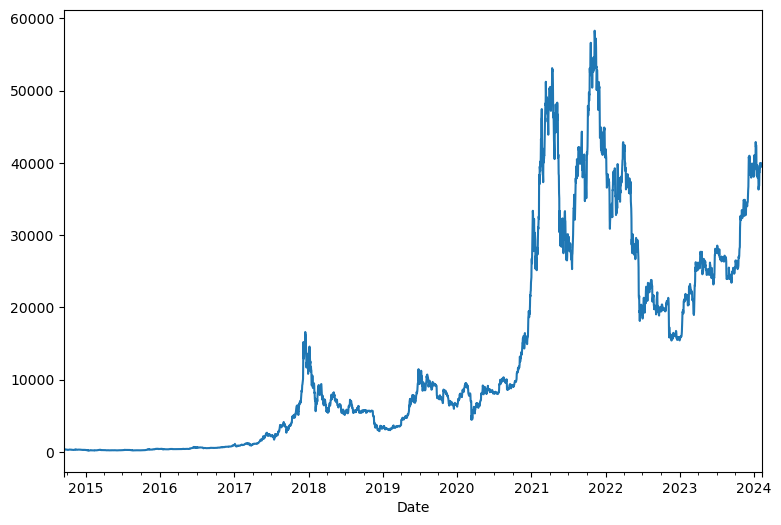

In [4]:
bitcoin['Close'].plot(figsize=(9,6))
plt.show()

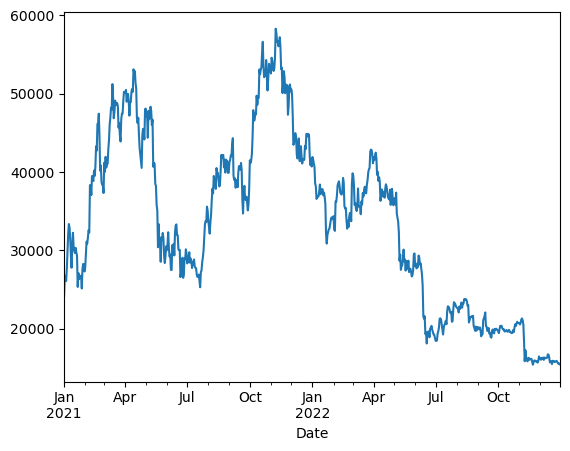

In [5]:
bitcoin['2021':'2022']['Close'].plot()
plt.show()

In [6]:
# bitcoin.loc['2021','Close'].resample('M').plot()
# plt.show()

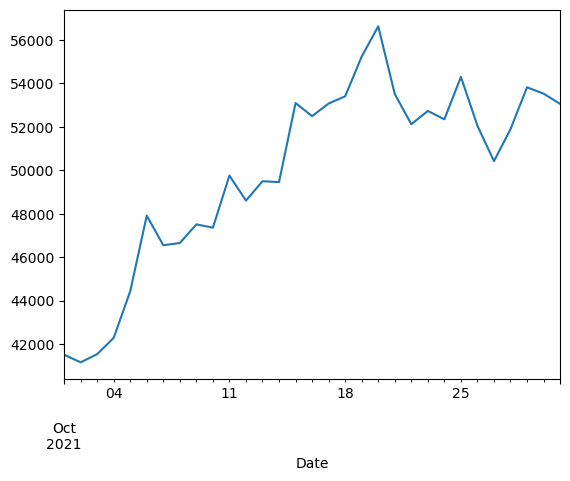

In [7]:
bitcoin.loc['2021-10']['Close'].plot()
plt.show()

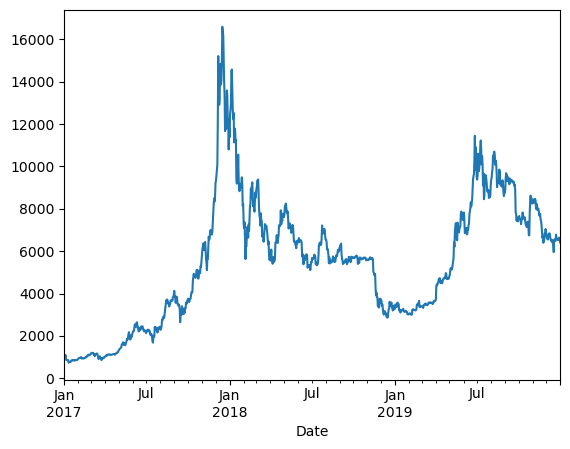

In [8]:
bitcoin['2017':'2019']['Close'].plot()
plt.show()

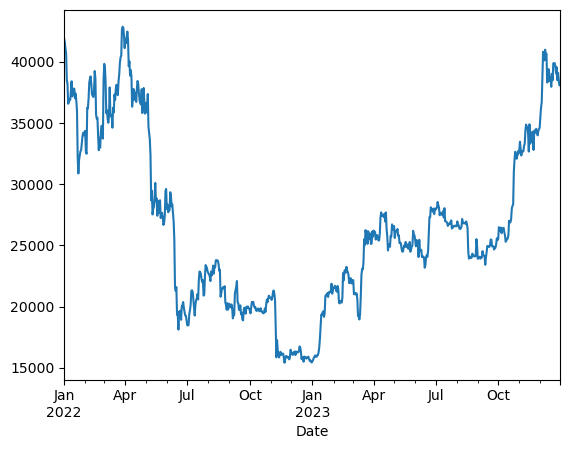

In [9]:
bitcoin.loc['2022':'2023','Close'].plot()
plt.show()

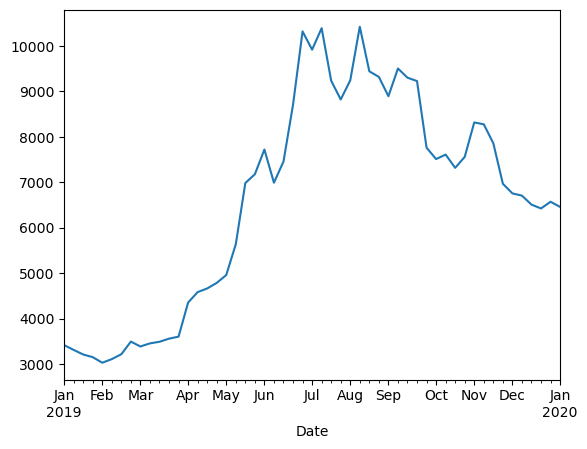

In [10]:
bitcoin.loc['2019','Close'].resample('W').mean().plot()
plt.show()

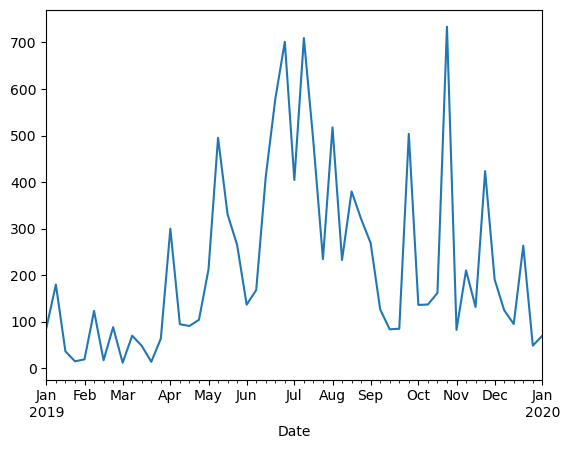

In [11]:
bitcoin.loc['2019','Close'].resample('W').std().plot()
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_22484\4164500657.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  bitcoin.loc['2019', 'Close'].resample('M').mean().plot(label='moyenne par mois', lw=3, ls=':', alpha=0.8)


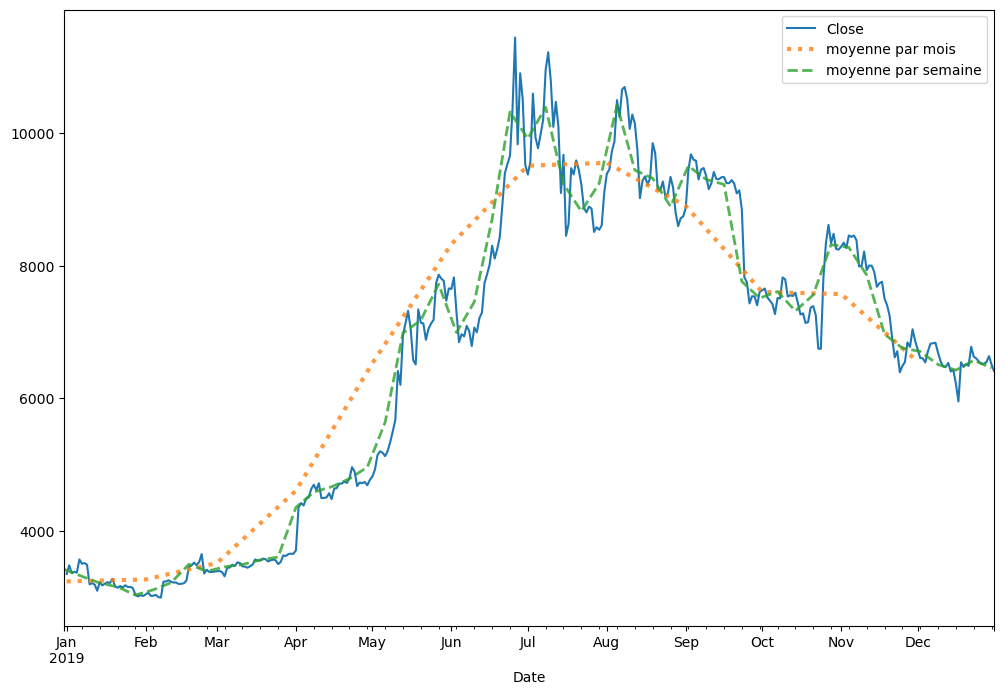

In [12]:
plt.figure(figsize=(12,8))
bitcoin.loc['2019', 'Close'].plot()
bitcoin.loc['2019', 'Close'].resample('M').mean().plot(label='moyenne par mois', lw=3, ls=':', alpha=0.8)
bitcoin.loc['2019', 'Close'].resample('W').mean().plot(label='moyenne par semaine', lw=2, ls='--', alpha=0.8)
plt.legend()
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_22484\956384277.py:1: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  m = bitcoin.loc['2019', 'Close'].resample('w').agg(['mean', 'std', 'min', 'max'])


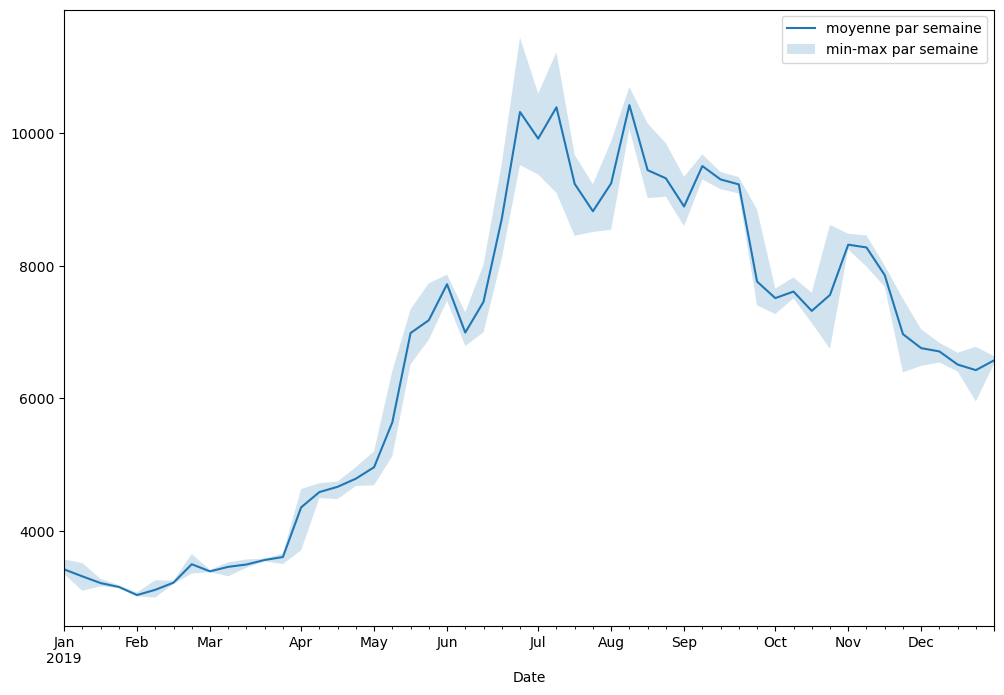

In [13]:
m = bitcoin.loc['2019', 'Close'].resample('w').agg(['mean', 'std', 'min', 'max'])
plt.figure(figsize=(12,8))
m['mean']['2019'].plot(label="moyenne par semaine")
plt.fill_between(m.index, m['max'], m['min'], alpha=0.2, label='min-max par semaine')
plt.legend()
plt.show()

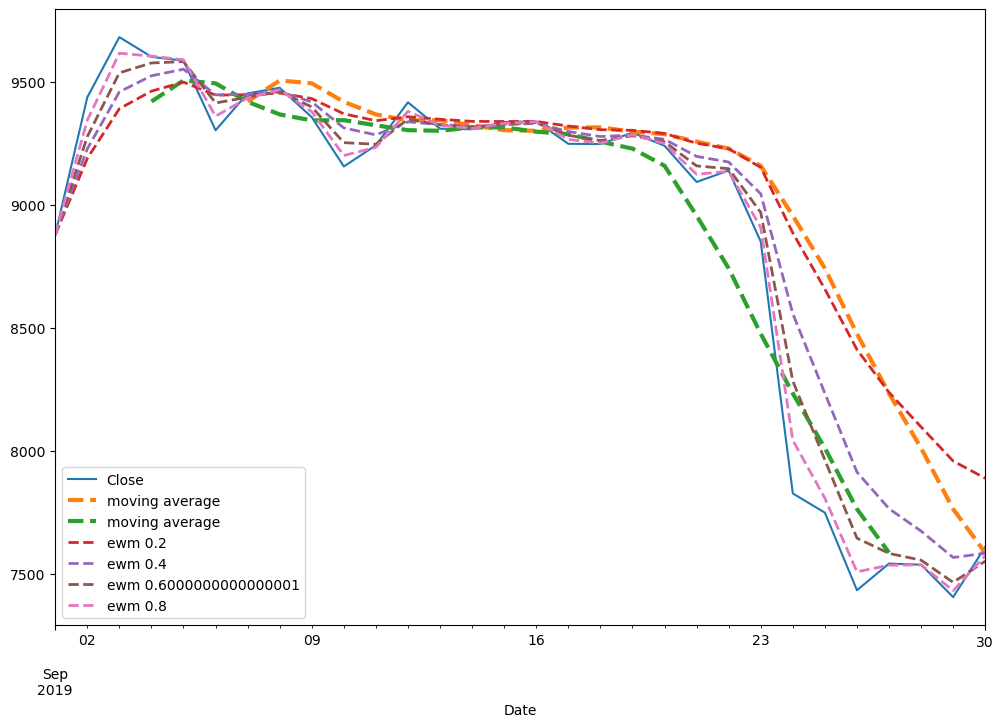

In [14]:
plt.figure(figsize=(12,8))
bitcoin.loc['2019-09', 'Close'].plot()
bitcoin.loc['2019-09', 'Close'].rolling(window=7).mean().plot(label='moving average', lw=3, ls='--')
bitcoin.loc['2019-09', 'Close'].rolling(window=7, center=True).mean().plot(label='moving average', lw=3, ls='--')
for i in np.arange(0.2, 1, 0.2):
    bitcoin.loc['2019-09', 'Close'].ewm(alpha=i).mean().plot(label=f'ewm {i}', lw=2, ls='--')
plt.legend()
plt.show()

In [17]:
ethereum = pd.read_csv('ETH-EUR.csv', index_col='Date', parse_dates=True)

In [19]:
ethereum.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-11,256.011322,273.902954,255.673492,269.811371,269.811371,722199256
2017-11-12,269.819092,273.739624,255.948730,264.072021,264.072021,1383773530
2017-11-13,263.314758,281.949707,263.405121,271.556213,271.556213,893329318
2017-11-14,271.596497,290.873871,271.573212,286.394958,286.394958,907354313
2017-11-15,286.677399,289.079956,279.644714,282.937531,282.937531,613364441


In [20]:
btc_eth = pd.merge(bitcoin, ethereum, on='Date',how='inner', suffixes=('_btc','_eth'))

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

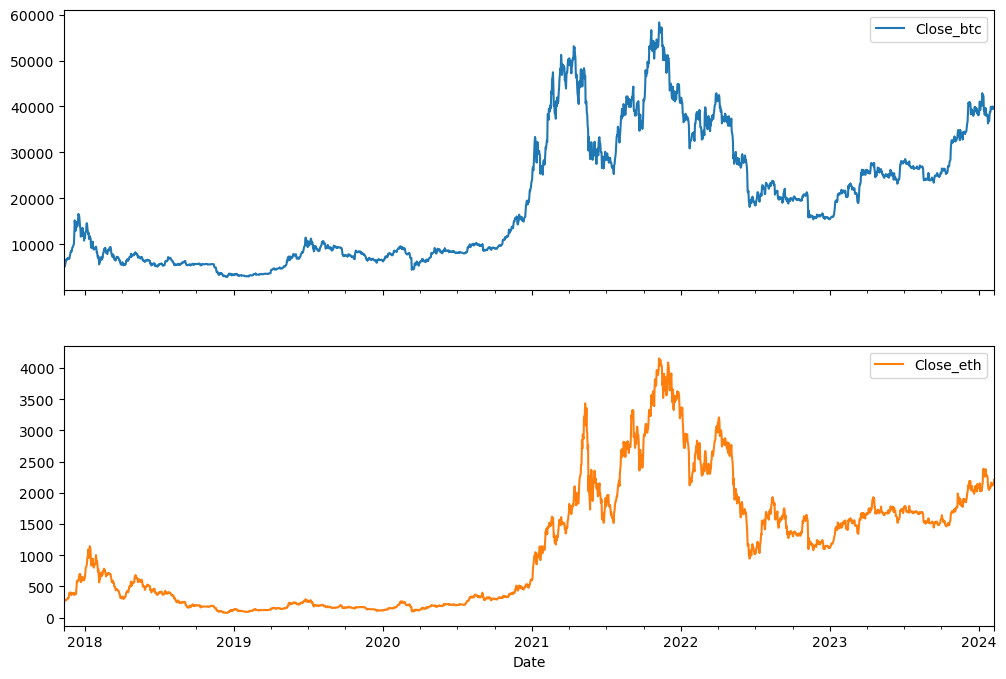

In [22]:
btc_eth[['Close_btc', 'Close_eth']].plot(subplots=True, figsize=(12,8))

In [23]:
correlation = btc_eth[['Close_btc', 'Close_eth']].corr()

<Axes: >

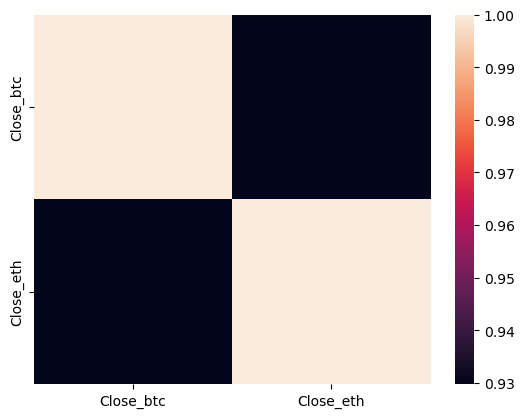

In [26]:
import seaborn as sns
sns.heatmap(correlation)

In [43]:
df = bitcoin.copy()
df['Buy'] = np.zeros(len(df))
df['Sell'] = np.zeros(len(df))

In [69]:
df['RollingMax'] = df['Close'].shift(1).rolling(window=28).max()
df['RollingMin'] = df['Close'].shift(1).rolling(window=28).min()
df.loc[df['RollingMax'] < df['Close'],'Buy'] = 1
df.loc[df['RollingMin'] > df['Close'],'Sell'] = -1

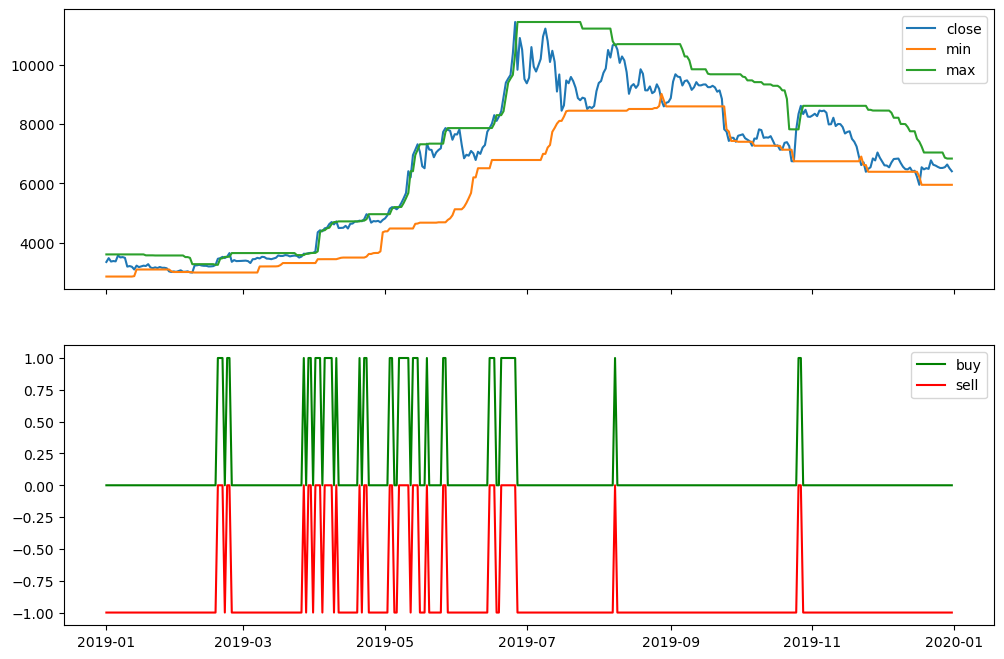

In [73]:
start ='2019'
end = '2019'
fig, ax = plt.subplots(2, figsize=(12,8),sharex=True)
ax[0].plot(df['Close'][start:end])
ax[0].plot(df['RollingMin'][start:end])
ax[0].plot(df['RollingMax'][start:end])
ax[0].legend(['close','min','max'])
ax[1].plot(df['Buy'][start:end],c='g')
ax[1].plot(df['Sell'][start:end],c='r')
ax[1].legend(['buy','sell'])